In [10]:
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype=np.float32)
x_train = x_train.reshape(-1,1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values,dtype=np.float32)
y_train = y_train.reshape(-1,1)

In [11]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
        super(linearRegression,self).__init__()
        self.linear = torch.nn.Linear(inputSize,outputSize)
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [12]:
inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 100

model = linearRegression(inputDim,outputDim)

if torch.cuda.is_available():
    model.cuda()

In [13]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [14]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs,labels)
    print(loss)
    loss.backward()
    
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch,loss.item()))

tensor(65.0168, grad_fn=<MseLossBackward0>)
epoch 0, loss 65.01676940917969
tensor(5.5936, grad_fn=<MseLossBackward0>)
epoch 1, loss 5.593608379364014
tensor(0.7434, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.7434059381484985
tensor(0.3446, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.3445829153060913
tensor(0.3089, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.3088814616203308
tensor(0.3028, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.30283406376838684
tensor(0.2992, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.2992403209209442
tensor(0.2959, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.2958814799785614
tensor(0.2926, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.29257604479789734
tensor(0.2893, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.28930890560150146
tensor(0.2861, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.28607800602912903
tensor(0.2829, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.28288352489471436
tensor(0.2797, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.2797248363494873
tenso

[[ 0.39636135]
 [ 2.4832907 ]
 [ 4.57022   ]
 [ 6.6571493 ]
 [ 8.744079  ]
 [10.831008  ]
 [12.917937  ]
 [15.004867  ]
 [17.091797  ]
 [19.178726  ]
 [21.265656  ]]


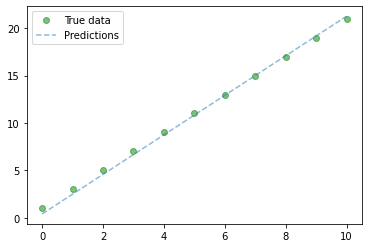

In [16]:
import matplotlib.pyplot as plt

with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    
    print(predicted)
    
    plt.clf()
    plt.plot(x_train,y_train,'go',label='True data',alpha=0.5)
    plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)
    plt.legend(loc='best')
    plt.show()